In [ ]:
from keras.datasets import mnist
import numpy as np
import sys
import os
sys.path.append(os.path.pardir)

(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train.shape)
print(t_train.shape)


(60000, 28, 28)
(60000,)


- Get random samples as a batch from trainning dataset

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


- mini-batch ver. 交叉熵误差实现

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size


- When `monitor data` is lable ("2", "7" and not like one-hot)

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]

    d = y[np.arange(batch_size),t] # y[0,2] , y[1,7], y[2,0] ...
    t = np.log(d + 1e-7)
    return - np.sum(t)/batch_size


## 数值微分
### 1.导数

#### Numberical Differentiantion(数值微分)

- bad instance   

    Give a minium value to `h`


In [ ]:
def numerical_diff(f,x):
    h = 10e-50
    return (f(x+h) - f(x))/h
    

In [ ]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) /(2*h)


- Sample function 1:

    $y=0.01_{x^2} + 0.1x$

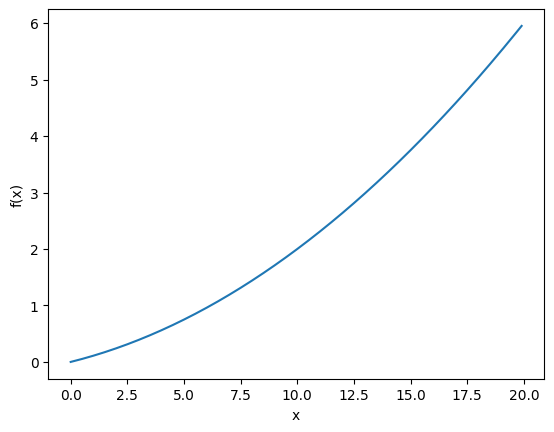

0.1999999999990898
0.2999999999986347


In [ ]:
def func_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,20.0,0.1)
y = func_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

d1 = numerical_diff(func_1,5) # f'(5)
d2 = numerical_diff(func_1,10) #  f'(10)
print(d1)
print(d2)

### 2. 偏导数

- Sample Funtion 2

    $ f(x0,x1) = x^2_0 + x^2_1$


(200, 200)
(200, 200)
(200,)


ValueError: Argument Z must be 2-dimensional.

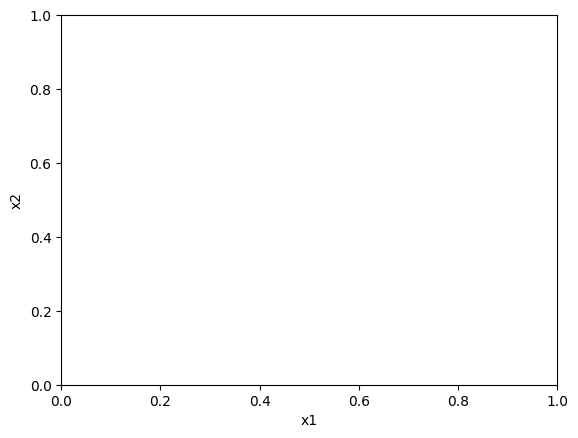

In [46]:
import numpy as np
import  matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d  import Axes3D

def func_2(x):
    return x[0]**2 +x[1]**2

data = np.arange(0.0,20.0,0.1)

# x = list()
# for i in range(len(data)):
#     x.append((data[i],data[i]))
# x = np.array(x)
# #print(x[0])

# y = list()
# y = func_2(x)
# print(y[0])


figure = plt.figure()
ax = Axes3D(figure)

X,Y = np.meshgrid(data,data)
Z = func_2((data,data))
print(X.shape)
print(Y.shape)
print(Z.shape)

plt.xlabel('x1')
plt.ylabel('x2')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap= 'rainbow')

#plt.show()
